#  **Sales Prediction Model**
**1. Project Overview**

The objective of this project is to build a predictive model for sales based on three advertising channels: TV, Radio, and Newspaper. The dataset used contains information about the advertising budget allocated to each channel and the corresponding sales figures.

The project involves:

Data loading and cleaning,

Exploratory data analysis and visualization,

Model development using a Random Forest Regressor, and

Model evaluation using several performance metrics.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

To load the data set first we add the google drive access and then we will acces the data set through that. But it is very important to first upload the data set in you drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
adv=pd.read_csv('/content/drive/MyDrive/Advertising.csv')
adv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# **2. Data Exploration and Preprocessing**
**2.1 Data Loading and Initial Checks**

**Dataset:** `Advertising.csv`

**Key columns:**

**TV:**  *TV advertising budget.*

**Radio:** *Radio advertising budget.*

**Newspaper:** *Newspaper advertising budget*.

**Sales:** *Actual sales.*

**Initial Operations:**

Checking for null values, data types, and basic statistics.
Dropped an unnamed index column that was not needed.

**2.2 Descriptive Statistics**
Basic Statistics: Summary statistics for each column (mean, min, max, etc.).
Missing Values: No missing data found.

**2.3 Data Visualization**

Histograms: Display the distributions of TV, Radio, Newspaper, and Sales.
Correlation Heatmap: Visualizes the relationships between the variables.
Boxplots: Created for each variable to identify outliers.
Regression Plots: Show the relationships between Sales and the advertising budgets (TV, Radio, Newspaper).
Pair Plot: Displays relationships among all the features.

In [ ]:
adv.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
adv.dtypes

,0
Unnamed: 0,int64
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [ ]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
adv.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
adv.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


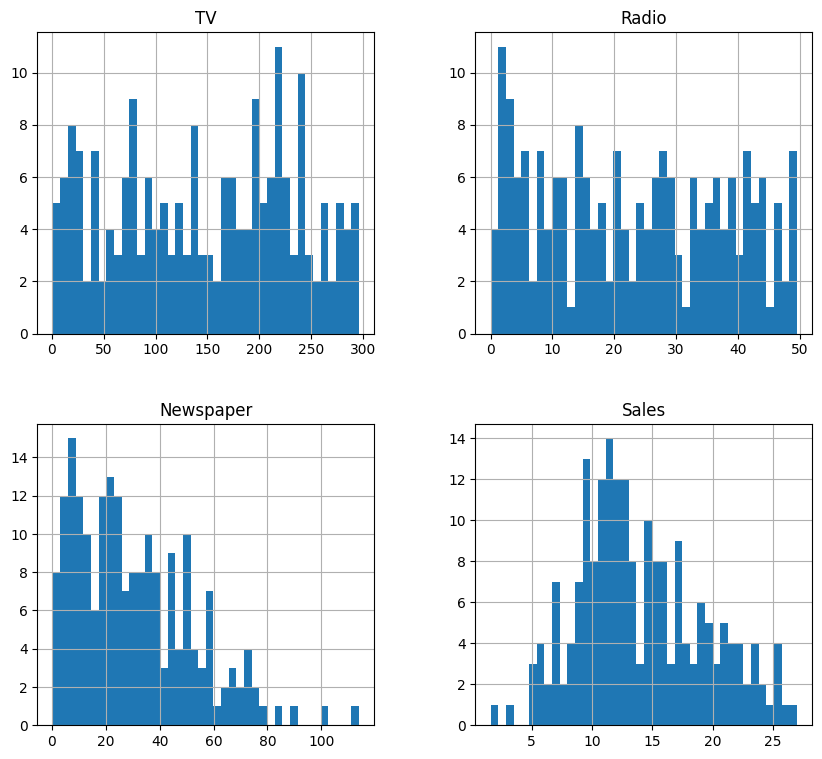

In [ ]:
adv.hist(figsize = (10,9), bins = 40)
plt.show()

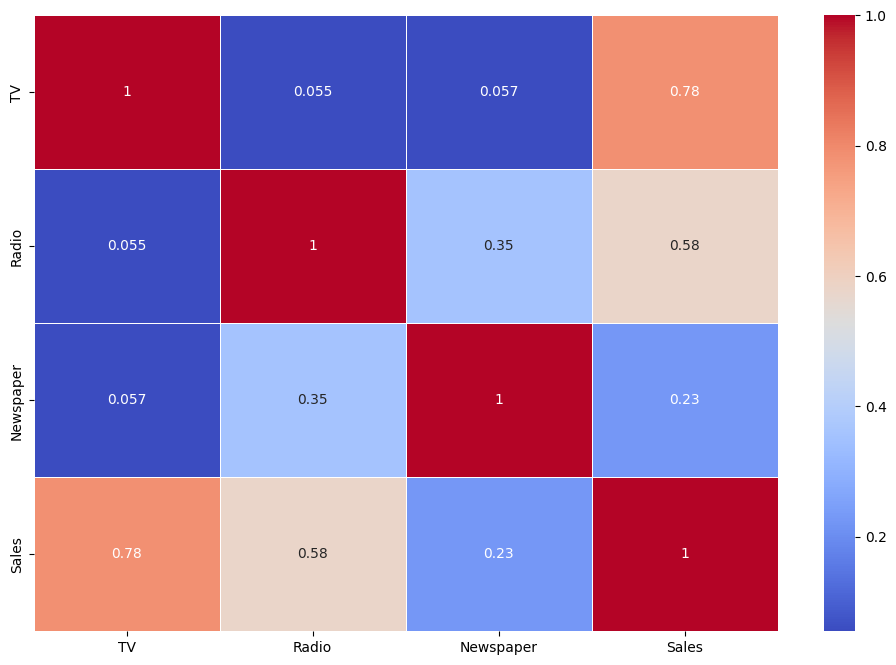

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(adv.corr(),annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


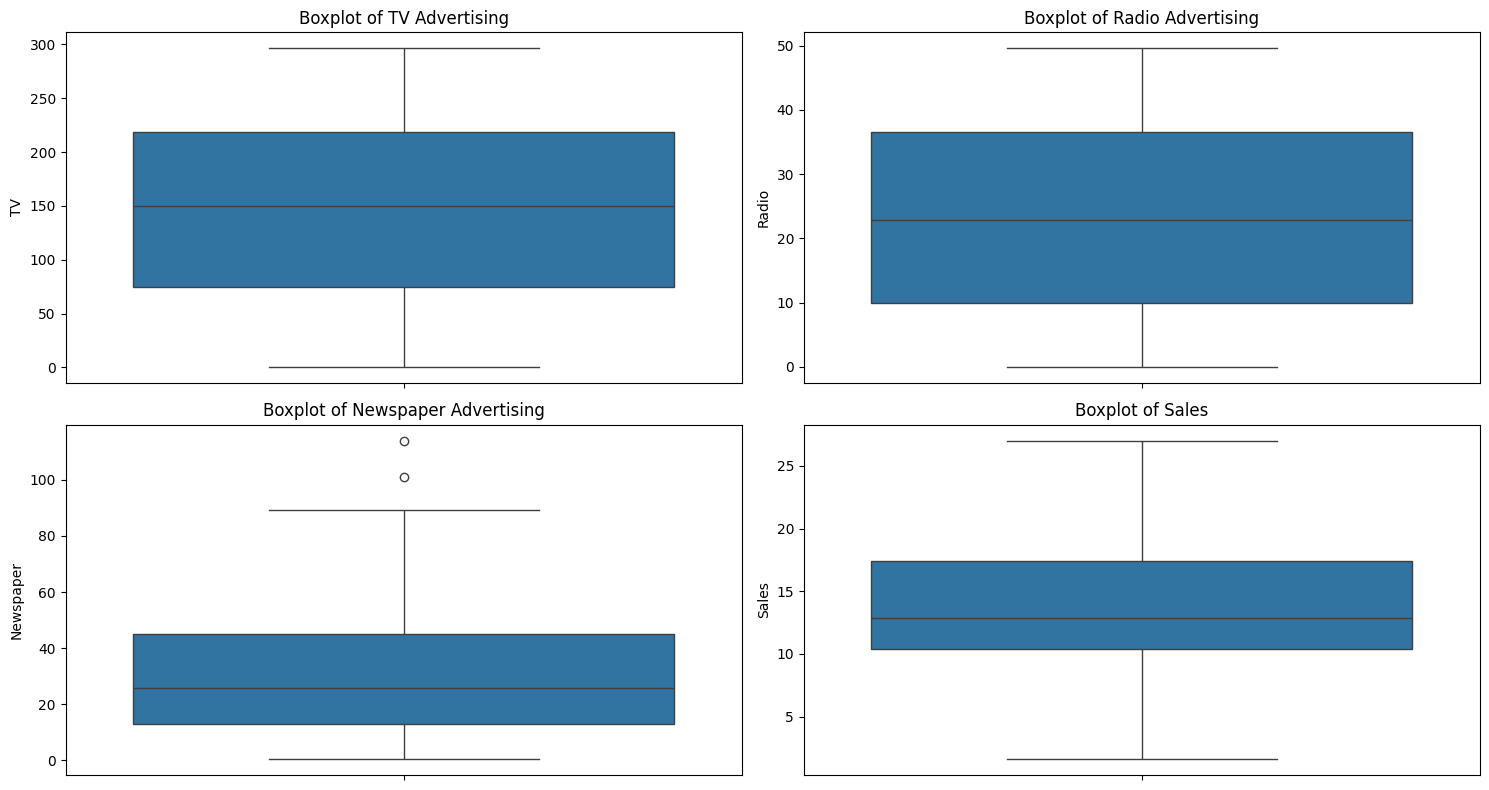

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Boxplot for TV
plt.subplot(2, 2, 1)
sns.boxplot(y=adv['TV'])
plt.title('Boxplot of TV Advertising')

# Boxplot for Radio
plt.subplot(2, 2, 2)
sns.boxplot(y=adv['Radio'])
plt.title('Boxplot of Radio Advertising')

# Boxplot for Newspaper
plt.subplot(2, 2, 3)
sns.boxplot(y=adv['Newspaper'])
plt.title('Boxplot of Newspaper Advertising')

# Boxplot for Sales
plt.subplot(2, 2, 4)
sns.boxplot(y=adv['Sales'])
plt.title('Boxplot of Sales')

plt.tight_layout()
plt.show()

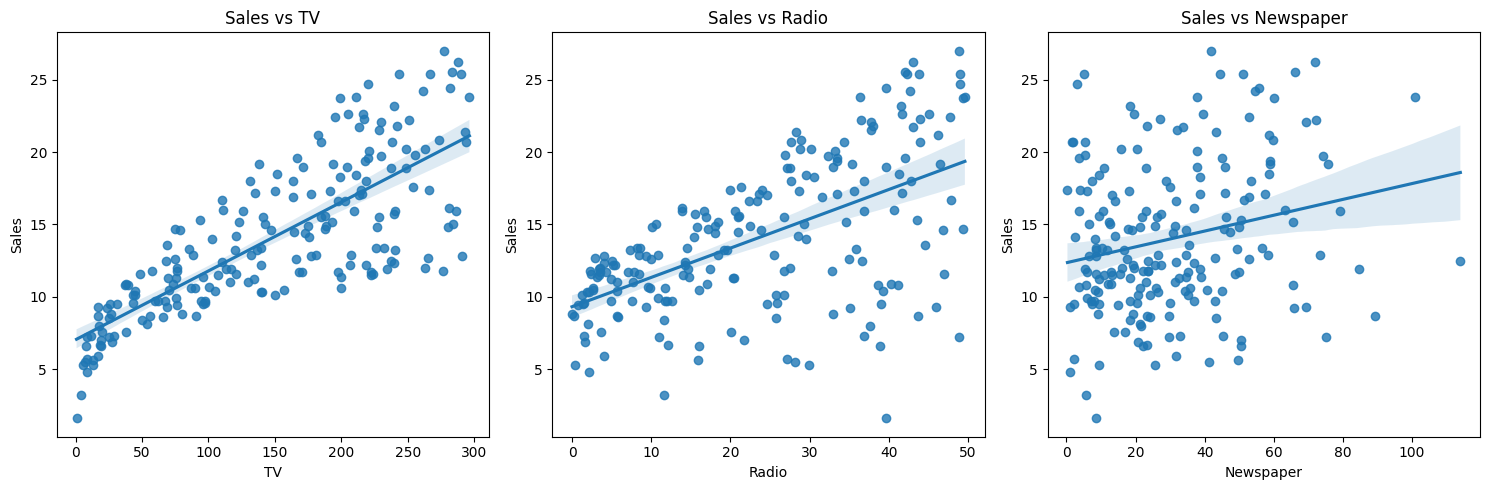

In [ ]:
plt.figure(figsize=(15, 5))

# Plot for TV
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.regplot(x='TV', y='Sales', data=adv)
plt.title('Sales vs TV')

# Plot for Radio
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.regplot(x='Radio', y='Sales', data=adv)
plt.title('Sales vs Radio')

# Plot for Newspaper
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.regplot(x='Newspaper', y='Sales', data=adv)
plt.title('Sales vs Newspaper')

# Show the plots
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

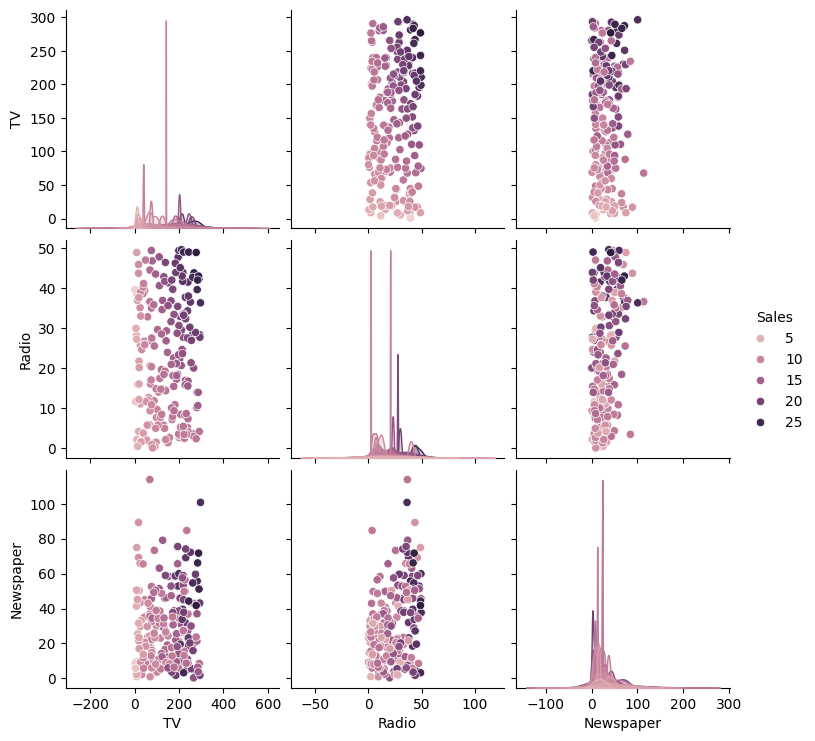

In [ ]:
sns.pairplot(data = adv , hue = 'Sales')

# **3. Model Development**
**3.1 Feature Selection**

The target variable is `Sales`.

The features used are `TV, Radio,` and` Newspaper`.

**3.2 Train-Test Split**

*Training Set:* 80% of the data.

*Test Set:* 20% of the data.
The dataset is split using` train_test_split()` for training and testing purposes.

**3.3 Model Selection**

A Random Forest Regressor is used as the primary model, chosen for its ability to handle non-linear relationships and reduce overfitting.

**3.4 Model Training**

The model is trained on the training data` (x_train, y_train).`
Random Forest Parameters:
Number of Trees `(n_estimators)`: 100
Random State: 42 (for reproducibility)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score

X = adv.drop('Sales', axis=1)
Y = adv[["Sales"]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=46)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


#**4. Model Evaluation**
**4.1 Predictions:**
Predictions are made on the test set `(x_test).`

**4.2 Performance Metrics:**
The following metrics were used to evaluate the performance of the Random Forest model:

**Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted sales.

          `MSE: {value}`

**Root Mean Squared Error (RMSE):** Square root of MSE, more interpretable.

      `RMSE: {value}`
**Mean Absolute Error (MAE): **The average of absolute differences between actual and predicted values.

      `MAE: {value}`
**R-squared (R²): **Represents the proportion of the variance for the dependent variable that's explained by the independent variables.

      `R²: {value}`
**4.3 Actual vs Predicted Values:**
 A table comparing *Actual Sales, Predicted Sales*, and the `Difference` between them was generated.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 2. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 3. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 4. R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")



Mean Squared Error (MSE): 0.496688725000001
Root Mean Squared Error (RMSE): 0.704761466738925
Mean Absolute Error (MAE): 0.5409250000000003
R-squared (R²): 0.9743885029251563


In [ ]:
y_test=y_test.to_numpy().ravel()
Difference=y_test-y_pred


array([15.2, 14.7, 12.9,  9.6, 24.4, 10.3, 11.7, 11.2, 13.6, 13.4, 10.8,
       21.8,  4.8, 15. , 12. , 10.7, 11.6,  9.2,  7.2, 15.9, 10.1, 16.9,
        7.3, 15.7,  5.3, 17. , 15. ,  7.2, 11.9, 22.6,  9.7, 17.3, 19. ,
       12.2, 18.3, 14.7, 12.9, 15.9,  8.6, 11.7])

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':Difference})
pred_df


,Actual Value,Predicted Value,Difference
0,15.2,14.786,0.414
1,14.7,13.327,1.373
2,12.9,13.631,-0.731
3,9.6,10.227,-0.627
4,24.4,23.516,0.884
5,10.3,10.525,-0.225
6,11.7,12.037,-0.337
7,11.2,11.440,-0.240
8,13.6,12.520,1.080
9,13.4,12.394,1.006


# **5. Conclusion**

This project demonstrates that a *`Random Forest Regressor`* can effectively predict sales based on advertising budgets for TV, Radio, and Newspaper. The model shows strong predictive performance with low errors and a high R², indicating it captures the relationship between advertising spend and sales well.

Further improvements can be made through hyperparameter tuning and exploring additional features, but the current model provides a solid foundation for sales prediction.